# Polynomial Regression <hr>
## Polynomial Regression 理論概述

### Regression Equation

![](回歸方程式.PNG)

這邊主要在介紹幾種回歸的本身的差異：<br>
1.簡單線性回歸 ：截距項+單一變數 $X_1$ 的線性方程式。<br>
2.複回歸      ：截距項+多個變數 $X_1$~$X_n$的線性方程式。<br>
3.多項式回歸   ：截距項+單一變數 $X_1^n$的非線性方程式，屬於複回歸的一種特例。<hr>

### Simple Linear Regression Plot

![](plot_simple.PNG)

### Ploynomial Regression Plot

![](plot_ploynomial.PNG)

### why <span style="color:blue">"Linear"</span>?
通常在判斷是否為線性方程式時，不是在觀察$X$變數是否為線性，而是去觀察它的係數<span style="color:red">$b_n$</span>是否可以用線性組合來表達，可不可以再加上$X$的值去預測出$Y$，所以線性還非線性是去看係數，當係數相對於$Y$呈線性關係，即稱線性模型。
***

## Python範例

### 分成幾個部分：<br>
 1.資料集說明。<br> 
 2.資料預處理。<br>
 3.建立預測模型。<br>
 4.圖形比較。 <br>
 5.預測比較。<hr>

### <span style="color:blue">1.資料集說明 </span>

![](dataset.PNG)

<span style="color:blue">情境描述</span> ：有一個公司的人資團隊為了要雇用新員工，在面試的過程中談論到預期薪資，面試者說他過去有20年以上的工作經驗，前一份工作年薪16萬，所以預期年薪不低於原薪水，而人資向面試者前公司索取他們各職等的年薪，人資根據面試者在此的經歷(<span style="color:blue">Region Manager</span>兩年 ，且平均四年可以往上升一階，所以約在<span style="color:red">6.5</span> 的職等上)，去判斷他說的年薪真假與否。<br>

此資料集共有三個欄位：職位(Position)、職等(Level)、年薪(Salary)。而職位和職等是屬於相同的概念，所以我們只取<span style="color:red">職等(Level)</span>、<span style="color:red">年薪(Salary)</span>兩個欄位，用 $X$ 職等(Level) 對 $Y$ 年薪(Salary)進行預測。<Hr>


### <span style="color:blue">2.資料預處理 </span>

#### 載入套件

In [3]:
#Polynomial Regression
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#### 修改當下檔案開啟目錄

In [4]:
os.chdir("/Users/aa006/Desktop/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression")

#### 載入資料

In [5]:
#Importing the dataset
dataset  =pd.read_csv('Position_Salaries.csv')
X =dataset.iloc[:,1:2].values
y =dataset.iloc[:,2].values

因為資料筆數過少(10筆)，所以作者在這邊沒有做 Data Split 。<br>
在這裡不做Data Split 有兩個原因，一個是資料筆數太少，二是我們需要很精確的預測結果，因為要用來談薪水，所以需要盡可能多的資訊。

### <span style="color:blue">3.建立預測模型</span> 

因為X變數只有一個，所以作者在這邊分別利用簡單線性回歸VS多項式回歸進行預測模型並且比較結果。

##### 簡單線性回歸

In [6]:
#Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#####  多項式回歸

In [7]:
#Fitting polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg =PolynomialFeatures(degree =2)
X_poly =poly_reg.fit_transform(X)
lin_reg2 =LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

為了比較一般線性和多項式回歸的差異，作者在這邊建立了兩個方程式，一個簡單線性回歸取名為lin_reg，一個多項式回歸取名為poly_reg。<br>
多項式回歸在執行前要利用預處理的library將多項式的class PolynomialFeatures讀入。<br>
這邊要寫清楚一點 待補!!!!

### <span style="color:blue">4.圖形比較</span> 

散佈圖$+$配適線。比較 前公司提供的年薪 與 回歸線的配適。<br>
##### 簡單線性回歸

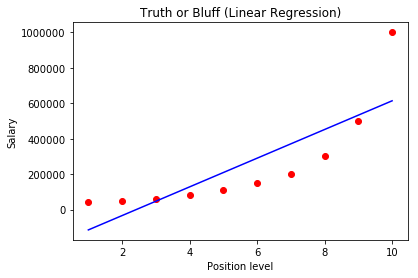

In [10]:
#visualising the linear regression results
plt.scatter (X,y,color ='red')
plt.plot(X,lin_reg.predict(X),color ='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

show 是將圖準備好並顯示出來。

#####  多項式回歸 <br>
<span style="color:red">平方</span> 

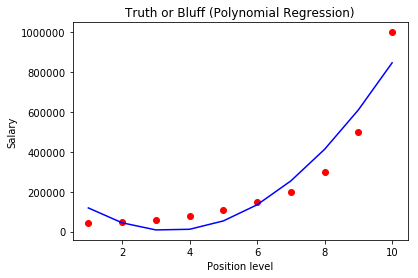

In [12]:
#visualising the polynomial regression results
plt.scatter (X,y,color ='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color ='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

作者提到在這裡要注意的是放預測年薪時，不能直接放X_poly，因為他是一個已經實際存在的特徵矩陣，但我們要可以用來替換任一個新的資料。<br>
***
<span style="color:red">三次方</span> 

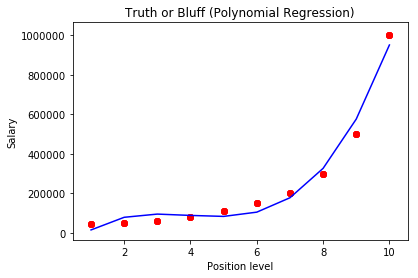

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg =PolynomialFeatures(degree =3)
X_poly =poly_reg.fit_transform(X)
lin_reg3 =LinearRegression()
lin_reg3.fit(X_poly,y)
#visualising the polynomial regression results
plt.scatter (X,y,color ='red')
plt.plot(X,lin_reg3.predict(poly_reg.fit_transform(X)),color ='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

***
<span style="color:red">四次方</span> 

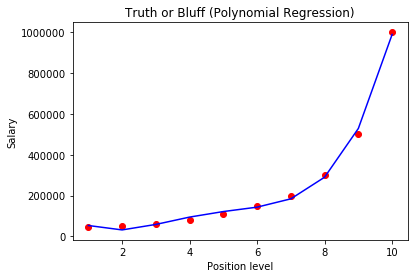

In [21]:
#Fitting polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg =PolynomialFeatures(degree =4)
X_poly =poly_reg.fit_transform(X)
lin_reg4 =LinearRegression()
lin_reg4.fit(X_poly,y)
#visualising the polynomial regression results
plt.scatter (X,y,color ='red')
plt.plot(X,lin_reg4.predict(poly_reg.fit_transform(X)),color ='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

arange是在給定的區間內進行等距切割，但是做完會是向量，所以要用reshape轉換成矩陣，
是可以讓配適線更加平滑，因為他在畫線是一點接一點，而不是在X軸上顯示更多點，因為她是寫再配適線的裡面

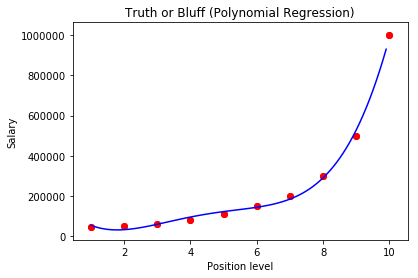

In [24]:
#Fitting polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg =PolynomialFeatures(degree =4)
X_poly =poly_reg.fit_transform(X)
lin_reg5 =LinearRegression()
lin_reg5.fit(X_poly,y)
#visualising the polynomial regression results
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter (X,y,color ='red')
plt.plot(X_grid,lin_reg5.predict(poly_reg.fit_transform(X_grid)),color ='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

***
### <span style="color:blue">5.預測比較</span> 

#####  簡單線性回歸 

In [27]:
#predicting a new result with linear regression
lin_reg.predict(6.5)

array([ 330378.78787879])

#####  多項式回歸 

In [28]:
#predicting a new result with linear regression
lin_reg4.predict(poly_reg.fit_transform(6.5))

array([ 158862.45265153])